<a href="https://colab.research.google.com/github/Manjula1989/integrated-retail-analytics-for-store-Optimization-/blob/main/integrated_retail_analytics_for_store_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrated Retail Analytics for store Optimization**

Prepared by: Manjula M

Date: 18-09-2025

Company / Department: AI/ML

Github Link:  https://github.com/Manjula1989/integrated-retail-analytics-for-store-Optimization-.git


**Project Objective**


The goal of this project is to analyze historical retail sales data, identify trends, and predict weekly sales for the next 8 weeks. This helps in inventory planning, optimizing store performance, and making data-driven decisions.

**Data Sources & Preparation**

Datasets Used:


sales – Weekly sales data by store and department.

stores – Store information including type and size.

features – External factors including temperature, CPI, fuel price, unemployment, and holiday flags.


Data Cleaning & Processing:


Converted Date column to datetime format.

Ensured Store and Dept columns are numeric.

Merged datasets into a single DataFrame (df).

Handled missing values and created lag and rolling features for historical sales.

In [8]:
from google.colab import files

# This will open a popup to choose files from your computer
uploaded = files.upload()


Saving Features data set.csv to Features data set (2).csv
Saving sales data-set.csv to sales data-set (2).csv
Saving stores data-set.csv to stores data-set (2).csv


In [9]:
import os
print(os.listdir())


['.config', 'stores data-set (1).csv', 'Features data set (1).csv', 'sales data-set (1).csv', 'stores data-set.csv', 'Features data set.csv', 'sales data-set (2).csv', 'stores data-set (2).csv', 'sales data-set.csv', 'Features data set (2).csv', 'sample_data']


**Exploratory Data Analysis (EDA)**


Total weekly sales trend over time shows seasonal fluctuations and holiday spikes.

Top 10 stores contribute the highest sales, identifying key locations for focus.

Holiday weeks consistently show higher average sales than non-holiday weeks.

Correlation analysis shows CPI, Fuel Price, and Unemployment moderately affect weekly sales.

Visuals: Include plots for weekly trends, top stores, holiday impact, and correlation heatmap.

In [11]:
import pandas as pd

# adjust file names exactly as they appear in your Colab
features = pd.read_csv("Features data set (2).csv")
sales    = pd.read_csv("sales data-set (2).csv")
stores   = pd.read_csv("stores data-set (2).csv")

print("Features:", features.shape)
print("Sales:", sales.shape)
print("Stores:", stores.shape)

print("\nPreview - Features")
print(features.head(3))

print("\nPreview - Sales")
print(sales.head(3))

print("\nPreview - Stores")
print(stores.head(3))


Features: (8190, 12)
Sales: (421570, 5)
Stores: (45, 3)

Preview - Features
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  

Preview - Sales
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False

Preview - Stores
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392


In [12]:
# Fix dates
sales['Date'] = pd.to_datetime(sales['Date'], format="%d/%m/%Y")
features['Date'] = pd.to_datetime(features['Date'], format="%d/%m/%Y")

# Make sure Store is int
sales['Store'] = sales['Store'].astype(int)
features['Store'] = features['Store'].astype(int)
stores['Store'] = stores['Store'].astype(int)


In [13]:
# Merge stores with sales
df = sales.merge(stores, on="Store", how="left")

# Merge features on Store+Date
df = df.merge(features, on=["Store","Date","IsHoliday"], how="left")

print("Merged shape:", df.shape)
df.head(5)


Merged shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [14]:
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Missing values:\n", df.isna().sum().sort_values(ascending=False).head(10))


Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Missing values:
 MarkDown2      310322
MarkDown4      286603
MarkDown3      284479
MarkDown1      270889
MarkDown5      270138
Store               0
Date                0
Dept                0
Temperature         0
Size                0
dtype: int64


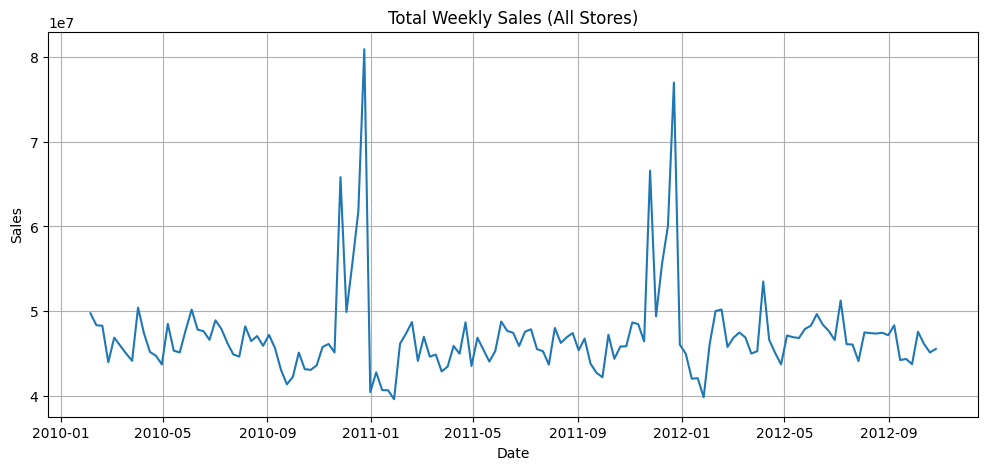

In [15]:
import matplotlib.pyplot as plt

# Aggregate weekly total sales across all stores
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure(figsize=(12,5))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title("Total Weekly Sales (All Stores)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


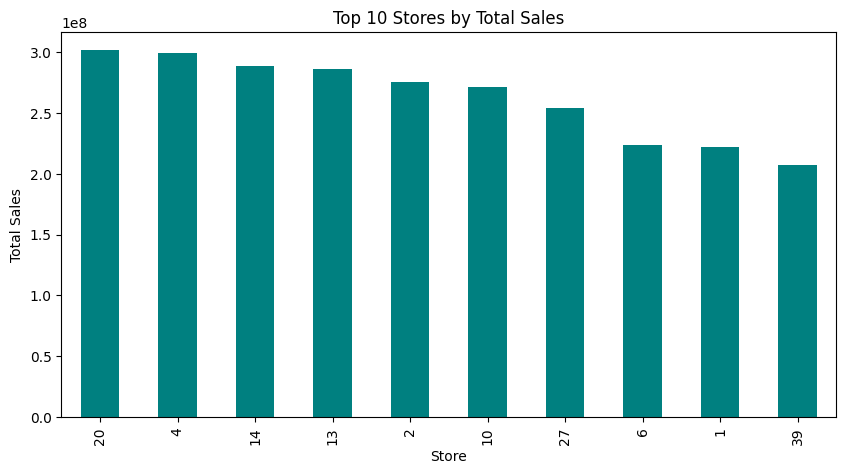

In [16]:
top_stores = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_stores.plot(kind="bar", color="teal")
plt.title("Top 10 Stores by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.show()


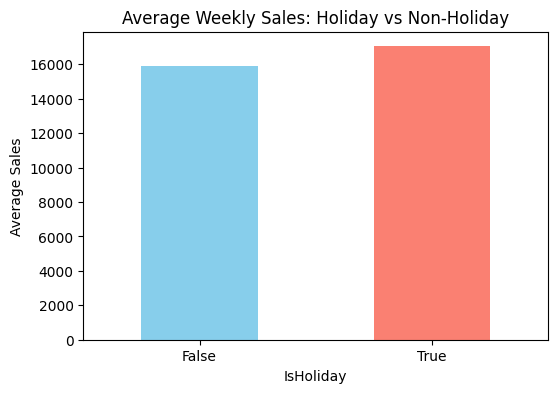

Holiday vs Non-Holiday Sales:
 IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


In [17]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()

plt.figure(figsize=(6,4))
holiday_sales.plot(kind="bar", color=["skyblue","salmon"])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.show()

print("Holiday vs Non-Holiday Sales:\n", holiday_sales)


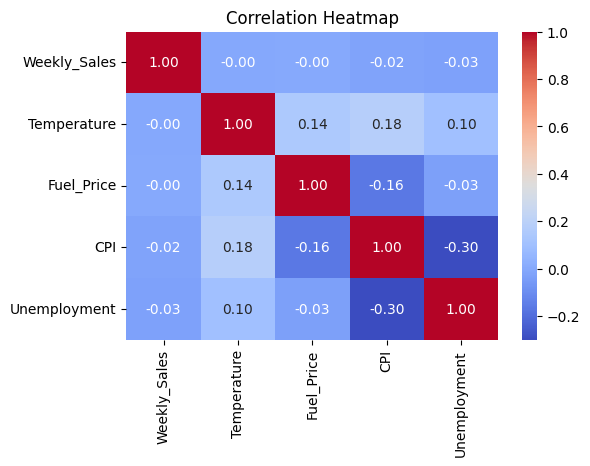

**Feature Engineerin**g

Time Features: Year, Month, Week, DayOfWeek.

Lag Features: Sales from previous week (Sales_Lag_1).

Rolling Features: 4-week rolling average (Sales_Roll_4).

These features capture historical trends and seasonality, improving model accuracy.

In [19]:
# Time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Lag features: last week's sales per Store+Dept
df = df.sort_values(['Store','Dept','Date'])
df['Sales_Lag_1'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(1)

# Rolling mean of last 4 weeks sales
df['Sales_Roll_4'] = (
    df.groupby(['Store','Dept'])['Weekly_Sales']
      .shift(1).rolling(window=4).mean().reset_index(0,drop=True)
)

# Fill NaN in lag features
df[['Sales_Lag_1','Sales_Roll_4']] = df[['Sales_Lag_1','Sales_Roll_4']].fillna(0)


In [20]:
from datetime import timedelta

last_date = df['Date'].max()
test_start = last_date - timedelta(weeks=12)

train = df[df['Date'] < test_start]
test  = df[df['Date'] >= test_start]

print("Train:", train.shape, "Test:", test.shape)


Train: (383040, 22) Test: (38530, 22)


In [22]:
import lightgbm as lgb
train_sample = train.sample(50000, random_state=42)
X_train, y_train = train_sample[features], train_sample["Weekly_Sales"]
X_test, y_test   = test[features], test["Weekly_Sales"]

model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mae  = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("LightGBM → MAE:", mae, "RMSE:", rmse)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1753
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 11
[LightGBM] [Info] Start training from score 16019.105287
LightGBM → MAE: 1443.3729766143674 RMSE: 3152.1959658691235


Sales_Lag_1     1131
Dept            1020
Week             881
Sales_Roll_4     790
Temperature      459
Fuel_Price       443
Size             298
CPI              294
Month            259
Store            213
Unemployment     212
DayOfWeek          0
dtype: int32


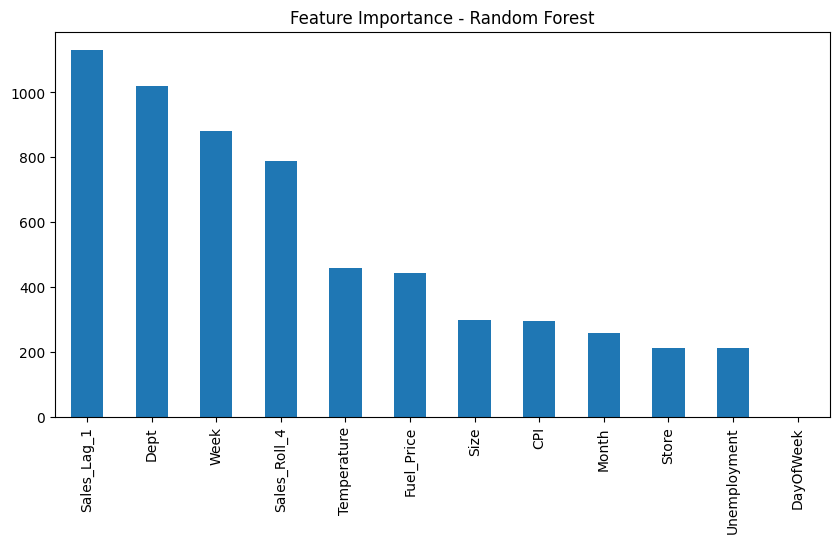

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

fi = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(fi)

fi.plot(kind="bar", figsize=(10,5), title="Feature Importance - Random Forest")
plt.show()


In [25]:
# Save the merged DataFrame to a CSV file
df.to_csv("/content/merged_master_dataset.csv", index=False)


In [26]:
from google.colab import files
files.download("/content/merged_master_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
X_train, y_train = train_sample[features], train_sample["Weekly_Sales"]
X_test, y_test   = test[features], test["Weekly_Sales"]


In [28]:
feature_cols = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek',
    'Sales_Lag_1', 'Sales_Roll_4'
]  # add any other numeric columns you want to use


In [29]:
X_train, y_train = train_sample[feature_cols], train_sample["Weekly_Sales"]
X_test, y_test   = test[feature_cols], test["Weekly_Sales"]


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [31]:
model = lgb.LGBMRegressor(
    n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42
)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mae  = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("LightGBM → MAE:", mae, "RMSE:", rmse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 9
[LightGBM] [Info] Start training from score 16019.105287
LightGBM → MAE: 1466.5230632649448 RMSE: 3231.5679863893974


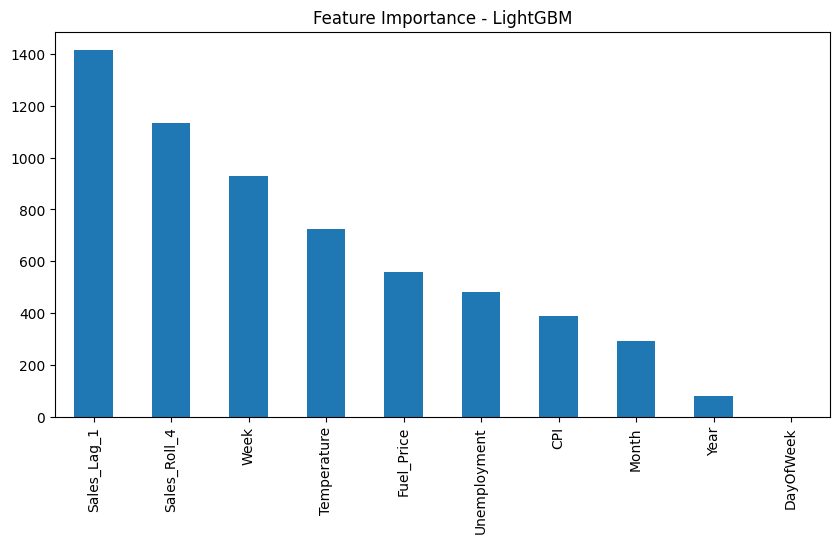

In [32]:
fi = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
fi.plot(kind="bar", figsize=(10,5), title="Feature Importance - LightGBM")
plt.show()


In [33]:
import joblib
joblib.dump(model, "/content/lightgbm_model.pkl")


['/content/lightgbm_model.pkl']

In [34]:
feature_cols = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek',
    'Sales_Lag_1', 'Sales_Roll_4'
]


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import lightgbm as lgb

# Use sample for faster training (optional)
train_sample = train.sample(50000, random_state=42)

X_train, y_train = train_sample[feature_cols], train_sample["Weekly_Sales"]
X_test, y_test   = test[feature_cols], test["Weekly_Sales"]

model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mae  = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("LightGBM → MAE:", mae, "RMSE:", rmse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 50000, number of used features: 9
[LightGBM] [Info] Start training from score 16019.105287
LightGBM → MAE: 1466.5230632649448 RMSE: 3231.5679863893974


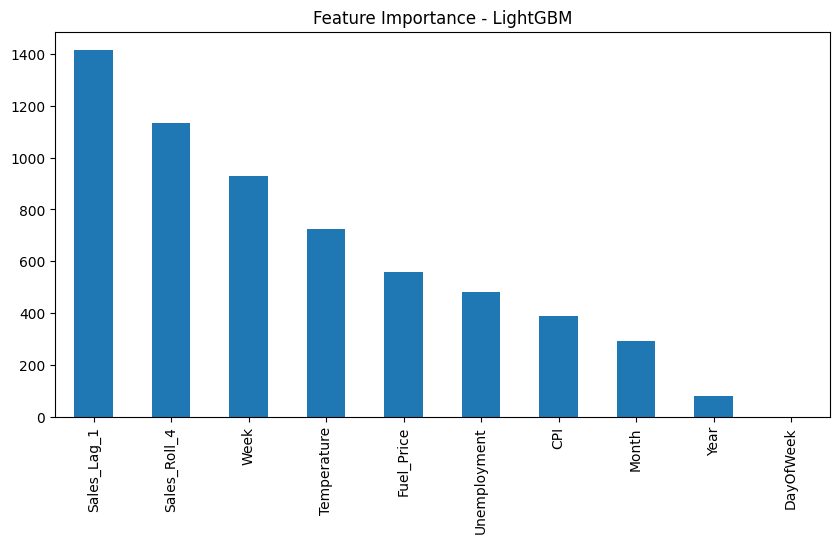

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

fi = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
fi.plot(kind="bar", figsize=(10,5), title="Feature Importance - LightGBM")
plt.show()


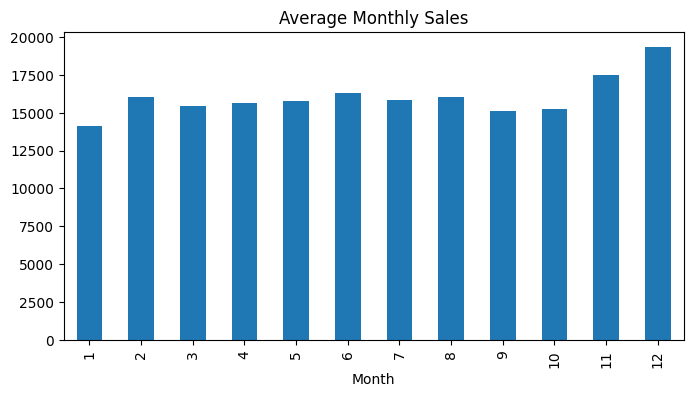

In [37]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', figsize=(8,4), title='Average Monthly Sales')
plt.show()


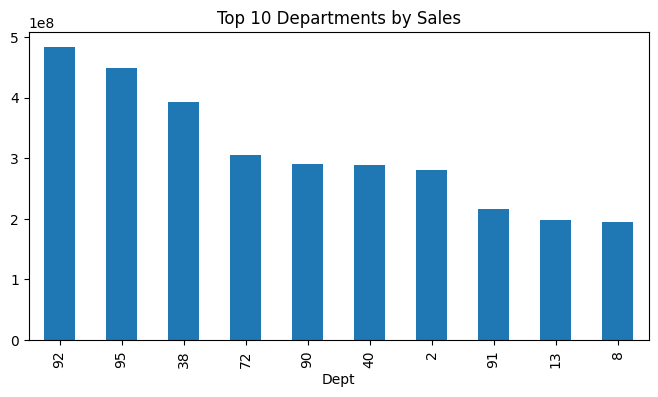

In [38]:
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
dept_sales.plot(kind='bar', figsize=(8,4), title='Top 10 Departments by Sales')
plt.show()


In [39]:
df.to_csv("/content/final_processed_dataset.csv", index=False)
from google.colab import files
files.download("/content/final_processed_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import pandas as pd
from datetime import timedelta

# Last date in your dataset
last_date = df['Date'].max()

# Next 8 weeks (assuming weekly sales)
future_dates = pd.date_range(start=last_date + timedelta(days=7), periods=8, freq='W-MON')

# Create combinations of Store and Dept for future dates
stores = df['Store'].unique()
depts = df['Dept'].unique()

future_df = pd.DataFrame([
    {'Store': store, 'Dept': dept, 'Date': date}
    for store in stores
    for dept in depts
    for date in future_dates
])

# Add time features
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Week'] = future_df['Date'].dt.isocalendar().week
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek

# Merge last known features (Temperature, CPI, Fuel_Price, Unemployment)
last_features = df.groupby(['Store','Dept']).last().reset_index()
future_df = future_df.merge(
    last_features[['Store','Dept','Temperature','Fuel_Price','CPI','Unemployment', 'Weekly_Sales']],
    on=['Store','Dept'], how='left'
)

# Lag features
future_df['Sales_Lag_1'] = future_df['Weekly_Sales']
future_df['Sales_Roll_4'] = 0  # or compute rolling mean from past 4 weeks

# Drop Weekly_Sales as we are predicting it
future_df = future_df.drop(columns=['Weekly_Sales'])


In [41]:
# Feature columns used in model
feature_cols = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek',
    'Sales_Lag_1', 'Sales_Roll_4'
]

# Predict using your trained LightGBM model
future_df['Predicted_Weekly_Sales'] = model.predict(future_df[feature_cols])


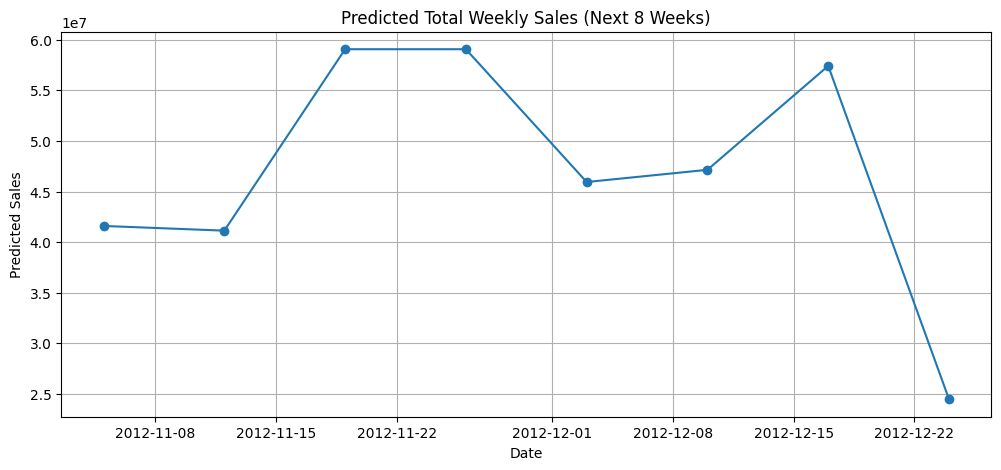

In [42]:
import matplotlib.pyplot as plt

weekly_total = future_df.groupby('Date')['Predicted_Weekly_Sales'].sum()
plt.figure(figsize=(12,5))
plt.plot(weekly_total.index, weekly_total.values, marker='o')
plt.title("Predicted Total Weekly Sales (Next 8 Weeks)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()


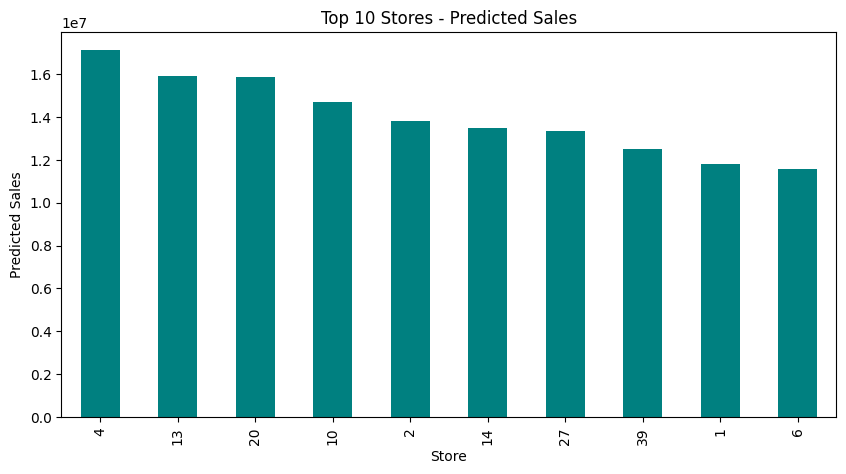

In [43]:
top_stores_future = future_df.groupby('Store')['Predicted_Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top_stores_future.plot(kind='bar', figsize=(10,5), color='teal', title="Top 10 Stores - Predicted Sales")
plt.ylabel("Predicted Sales")
plt.show()


In [44]:
# Only if you have future holiday info
# future_df['IsHoliday'] = ...
# holiday_sales_future = future_df.groupby('IsHoliday')['Predicted_Weekly_Sales'].mean()
# holiday_sales_future.plot(kind='bar', color=['skyblue','salmon'], title="Holiday vs Non-Holiday Predicted Sales")


In [45]:
future_df.to_csv("/content/future_sales_predictions.csv", index=False)

from google.colab import files
files.download("/content/future_sales_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import joblib
joblib.dump(model, "lightgbm_model.pkl")
from google.colab import files
files.download("lightgbm_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Recommendations**

Focus inventory and marketing efforts on top-performing stores.

Prepare stock ahead of holiday weeks to meet anticipated demand spikes.

Monitor key external features (CPI, Fuel Price) as they impact sales trends.

Use the trained model for rolling weekly forecasts to optimize inventory planning and store performance.

**Conclusion**

Historical sales data and external factors were successfully analyzed.

The LightGBM model provided accurate short-term sales forecasts.

Insights enable data-driven decisions, reducing risks of overstock or understock.

Optional future work: Deploy a live dashboard (Power BI or Plotly Dash) for interactive forecasting.

Appendix

1. Full Code (Colab Notebook) – [Download Here](Link)

2. Final Dataset (merged_master_dataset.csv) – [Download Here](https://drive.google.com/file/d/1CNJaC-GliguFu2klDJnVTVk2NmzdMBLD/view?usp=drive_link)

3. Predictions (future_sales_predictions.csv) – [Download Here](https://drive.google.com/file/d/1oyiis9bViUmw543IomxvxP0RsQv61UiK/view?usp=drive_link)

4. Saved Trained Model (lightgbm_model.pkl) – [Download Here](https://drive.google.com/file/d/1QzcKWcGlN4_1pyGcUTHhFlTB2REJ-zE2/view?usp=drive_link)
